# Final Project Submission

# Microsoft Market Research (Film industry)

* Student name: Jacqueline Chelang'at
* Student pace: part time
* Scheduled project review date/time: Phase 1 project 05/11/2023 13:52
* Instructor name: Samuel G
* Blog post URL:

## Overview & Business Problem
Microsoft would like to start a new revenue stream in original video content creation. 
Explore what types of films are currently doing the best at the box office. 
Translate the findings into actionable insights to help Microsoft decide if this is a viable business venture.


# The Data

3 Sets of data are utilized for this research,

**Title basics - Contains various movie titles, years, runtimes and genres.

**Movie gross - Contains various movie titles, studio, domestic gross, foreign gross and year.

**Title ratings - Contains the Average ratings and number of votes of various movies.


In [2]:
#Import the requisite libraries (Pandas, seaborn and matplotlib)
#Assign the file imdb.title.basics.csv.gz to a variable and read the CSV file in pandas to see the info contained
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('imdb.title.basics.csv.gz')
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


# Data cleaning

In [3]:
# Get an overall view of the title basics file and the number of null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
#Check summation of null values in the title basics file
df.isna().sum()

tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [5]:
#Check for duplicates in the title basics file
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [6]:
#Work out the mean of runtime_minutes to obtain the values to replace the missing values with
print(df['runtime_minutes'].mean())

86.18724706088021


In [7]:
#Replace the null values in the runtime_minutes column with the mean of runtimes
df['runtime_minutes'] = df['runtime_minutes'].fillna(value = df['runtime_minutes'].mean())
df.isna().sum()

tconst                0
primary_title         1
original_title       22
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

In [8]:
#Calculate the mean to confirm the if value has changed significantly after filling the null values
print(df['runtime_minutes'].mean())

86.18724706088021


In [9]:
#Fill the null values in the genres folder with the mode and confirm if there are any null values left
df['genres'] = df['genres'].fillna(value = df['genres'].mode()[0])
df.isna().sum()

tconst              0
primary_title       1
original_title     22
start_year          0
runtime_minutes     0
genres              0
dtype: int64

In [10]:
#Display and review the cleaned data
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,86.187247,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,86.187247,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.000000,Documentary


In [11]:
#Assign the movie_gross csv document to a variable and display the contents
df1 = pd.read_csv('bom.movie_gross.csv.gz')
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [12]:
#Check the number of null values in the movie_gross data
df1.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [13]:
#Display the details of the movie_gross data and number and data type of the variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [14]:
#Fill the null values in the domestic gross column of the movie_gross data with the the mean
df1['domestic_gross'] = df1['domestic_gross'].fillna(value = df1['domestic_gross'].mean())
df1.isna().sum()

title                0
studio               5
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [15]:
# Replace the foreign character in the foreign_gross column with blank
df1['foreign_gross'] = df1['foreign_gross'].str.replace(',','').apply(float)

#Check if the data type of the foreign gross column has changed from object to float

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [16]:
# Fill the null values in the foreign gross column with the median of the data

df1['foreign_gross'] = df1['foreign_gross'].fillna(value = df1['foreign_gross'].median())

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [17]:
#drop the remaining 5 rows showing null values on the studio column
df1 = df1.dropna()
df1.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [18]:
#display the details of the movie gross data to ensure the clean up of data is complete
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


In [19]:
#Assign a variable to the 3rd data set, the title ratings and display the data
df2 = pd.read_csv('imdb.title.ratings.csv.gz')
df2


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [20]:
#Display the details of the data to check the data types of the columns and the number of null values present
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


# Data Analytics

In [21]:
#Intall pandasql to enable you  to work with sql within the pandas dataframe
!pip install pandasql


In [22]:
#import pandas sql as sqldf
from pandasql import sqldf

In [23]:
#Pass a global variables to avoid doing this everytime we need to use an object
pysqldf = lambda q: sqldf(q, globals())

In [24]:
#Set the theme for the visuals as dark grid using seaborn libraries
sns.set_theme(style = 'darkgrid')

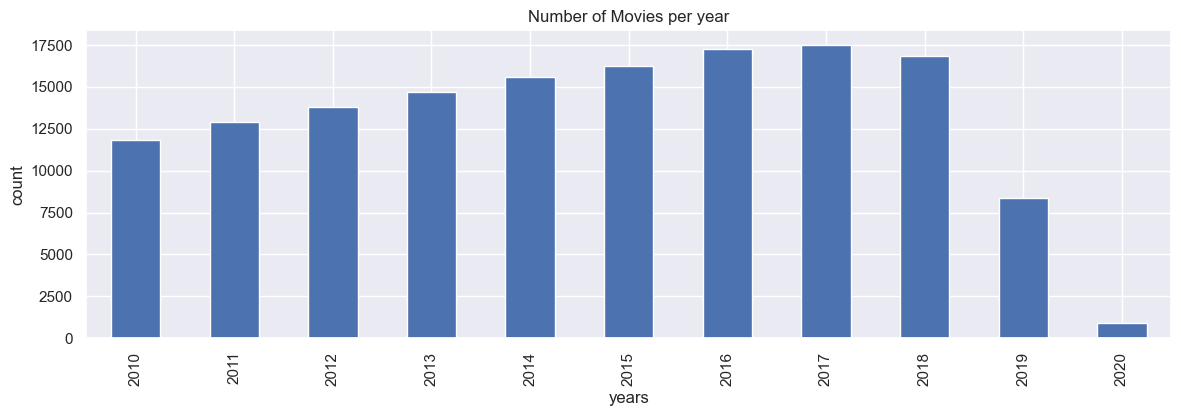

In [25]:
#Plot the number of movies that have been created over the years to observe the trend in the industry
q = """
SELECT start_year, Count(*) AS n_movies
FROM df
GROUP BY start_year
HAVING n_movies > 100
;"""

movie_genres_by_year_df = pysqldf(q)


fig, axes = plt.subplots(nrows =1, ncols = 1, figsize = (14,4))
movie_genres_by_year_df.set_index('start_year')['n_movies'].plot(kind='bar',ax=axes)
axes.set_title('Number of Movies per year')
axes.set_xlabel('years')
axes.set_ylabel('count');



In [26]:
#Join the three tables (title basics, movie gross and the title ratings), and assign the new table a variable
#Display the table
q1 = """
SELECT *
FROM df
INNER JOIN df1
ON df.primary_title = df1.title
INNER JOIN df2
USING (tconst);
"""

title_basics_join_movie_gross = pysqldf(q1)
title_basics_join_movie_gross

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,averagerating,numvotes
0,tt0315642,Wazir,Wazir,2016,103.000000,"Action,Crime,Drama",Wazir,Relbig.,1100000.0,18700000.0,2016,7.1,15378
1,tt0337692,On the Road,On the Road,2012,124.000000,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000.0,2012,6.1,37886
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.000000,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013,7.3,275300
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.000000,"Action,Crime,Drama",A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014,6.5,105116
4,tt0369610,Jurassic World,Jurassic World,2015,124.000000,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,1019.4,2015,7.0,539338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,tt9392532,Neighbors,Neighbors,2018,90.000000,"Comedy,Drama",Neighbors,Uni.,150200000.0,120500000.0,2014,7.6,18
3020,tt9447594,The Gambler,The Gambler,2019,121.000000,"Action,Sci-Fi,Thriller",The Gambler,Par.,33700000.0,5600000.0,2014,6.1,10
3021,tt9816988,Gold,Tala,2019,86.187247,Drama,Gold,Wein.,7200000.0,7700000.0,2017,5.2,26
3022,tt9851050,Sisters,Sisters,2019,86.187247,"Action,Drama",Sisters,Uni.,87000000.0,18000000.0,2015,4.7,14


In [27]:
# Display the foreign gross earnings, the average rating and the number of votes of the top 10 voted for movies
q2 = """
SELECT title, foreign_gross,averagerating, numvotes
FROM df
INNER JOIN df1
ON df.primary_title = df1.title
INNER JOIN df2
USING (tconst)
ORDER BY numvotes DESC
LIMIT 10;
"""

top_10_movies_by_votes = pysqldf(q2)
top_10_movies_by_votes

,title,foreign_gross,averagerating,numvotes
0,Inception,535700000.0,8.8,1841066
1,The Dark Knight Rises,636800000.0,8.4,1387769
2,Interstellar,489400000.0,8.6,1299334
3,Django Unchained,262600000.0,8.4,1211405
4,The Wolf of Wall Street,275100000.0,8.2,1035358
5,Shutter Island,166800000.0,8.1,1005960
6,Guardians of the Galaxy,440200000.0,8.1,948394
7,Deadpool,420000000.0,8.0,820847
8,The Hunger Games,286400000.0,7.2,795227
9,Mad Max: Fury Road,224800000.0,8.1,780910


In [28]:
# Display the top domestic gross, the average rating and the number of votes of the top 10 earning movies
q2 = """
SELECT title, foreign_gross,averagerating, numvotes
FROM df
INNER JOIN df1
ON df.primary_title = df1.title
INNER JOIN df2
USING (tconst)
ORDER BY foreign_gross DESC
LIMIT 10;
"""

top_10_movies_by_earnings = pysqldf(q2)
top_10_movies_by_earnings

,title,foreign_gross,averagerating,numvotes
0,Avengers: Age of Ultron,946400000.0,7.3,665594
1,Jurassic World: Fallen Kingdom,891800000.0,6.2,219125
2,Frozen,875700000.0,6.2,62311
3,Frozen,875700000.0,5.4,75
4,Frozen,875700000.0,7.5,516998
5,Wolf Warrior 2,867600000.0,6.2,5684
6,Transformers: Age of Extinction,858600000.0,5.7,283486
7,Minions,823400000.0,6.4,193917
8,Aquaman,812700000.0,7.1,263328
9,Iron Man 3,805800000.0,7.2,692794


In [29]:
# Display the top domestic gross, the average rating and the number of votes of the top 10 rated movies
q2 = """
SELECT title, foreign_gross,averagerating, numvotes
FROM df
INNER JOIN df1
ON df.primary_title = df1.title
INNER JOIN df2
USING (tconst)
ORDER BY averagerating DESC
LIMIT 10;
"""

top_10_movies_by_rating = pysqldf(q2)
top_10_movies_by_rating

,title,foreign_gross,averagerating,numvotes
0,The Wall,2700000.0,9.2,8
1,The Runaways,1100000.0,9.2,47
2,Tomorrow,18700000.0,9.1,15
3,The Way,18700000.0,9.0,9
4,The Mayor,18700000.0,8.9,49
5,Inception,535700000.0,8.8,1841066
6,Skin Trade,18700000.0,8.8,31
7,Bethlehem,18700000.0,8.8,19
8,Upgrade,2400000.0,8.8,69
9,Burn the Stage: The Movie,16100000.0,8.8,2067


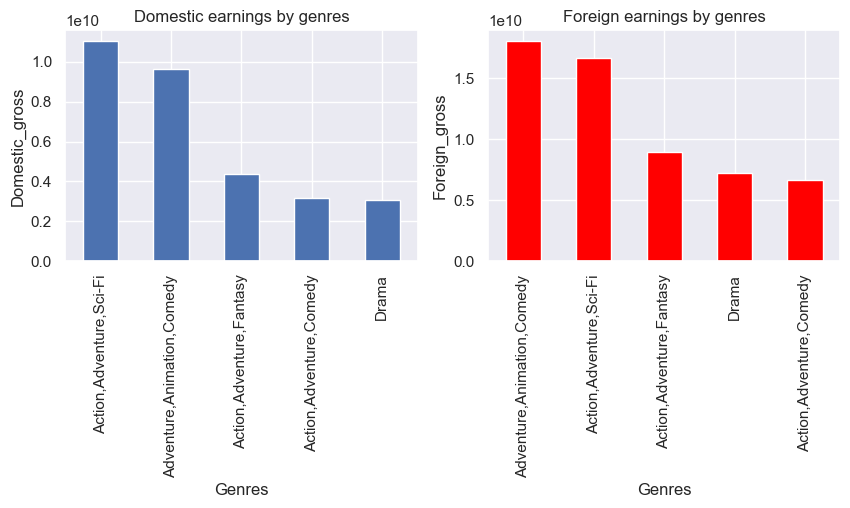

In [30]:
#Plot the genres by the total domestic gross earned and limit the entries to the top 5 items 
q3 = """
SELECT genres, SUM (domestic_gross) AS total_domestic_gross
FROM df
INNER JOIN df1
ON df.primary_title = df1.title
INNER JOIN df2
USING (tconst)
GROUP BY genres
ORDER BY total_domestic_gross DESC
LIMIT 5;
"""

domestic_earnings_by_genres_df = pysqldf(q3)

#Plot the genres by the total Foreign gross earned and limit the entries to the top 5 items 

q5 = """
SELECT genres, SUM (foreign_gross) AS total_foreign_gross
FROM df
INNER JOIN df1
ON df.primary_title = df1.title
INNER JOIN df2
USING (tconst)
GROUP BY genres
ORDER BY total_foreign_gross DESC
LIMIT 5;
"""

foreign_earnings_by_genres_df = pysqldf(q5)


fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize= (10,3))
domestic_earnings_by_genres_df.set_index('genres')['total_domestic_gross'].plot(kind = 'bar', ax = axes[0])
axes[0].set_title('Domestic earnings by genres')
axes[0].set_xlabel('Genres')
axes[0].set_ylabel('Domestic_gross');


foreign_earnings_by_genres_df.set_index('genres')['total_foreign_gross'].plot(kind = 'bar', color = 'red', ax = axes[1])
axes[1].set_title('Foreign earnings by genres')
axes[1].set_xlabel('Genres')
axes[1].set_ylabel('Foreign_gross');


AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

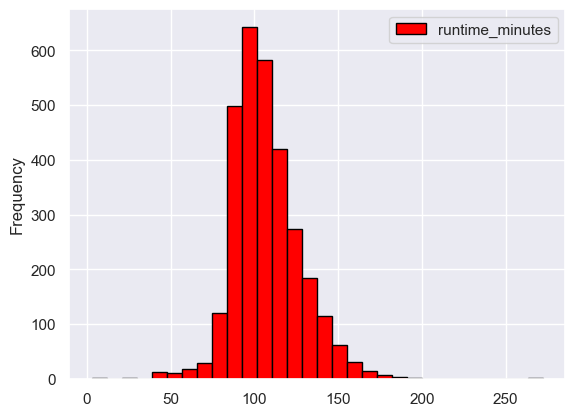

In [31]:
#plot a histogram to view the frequency distribution of runtimes_minutes
q4 = """
SELECT runtime_minutes
FROM df
INNER JOIN df1
ON df.primary_title = df1.title
INNER JOIN df2
USING (tconst);
"""

runtimes_minutes_df = pysqldf(q4)

runtimes_minutes_df.plot.hist(column = 'runtime_minutes', bins = 30, color = 'red', edgecolor = 'black')
axes.set_title('Runtime')
axes.set_xlabel('runtime_minutes')
axes.set_ylabel('Frequency');


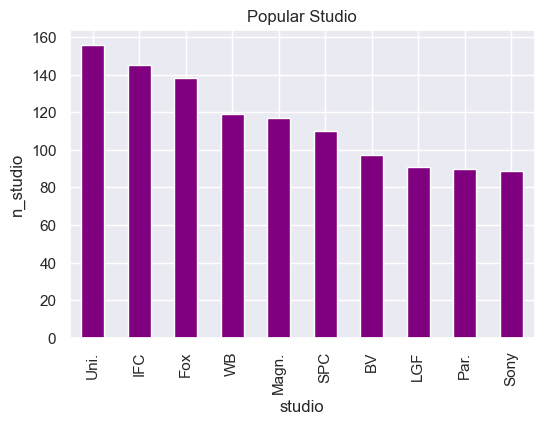

In [32]:
#plot a bar graph to show the most popular film studios
q6 = """
SELECT COUNT (studio) AS n_studio, studio
FROM df
INNER JOIN df1
ON df.primary_title = df1.title
INNER JOIN df2
USING (tconst)
GROUP BY studio
ORDER BY n_studio DESC
LIMIT 10;
"""

popular_studio_df = pysqldf(q6)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize= (6,4))

popular_studio_df.set_index('studio')['n_studio'].plot(kind = 'bar', ax = axes, color = 'purple')
axes.set_title('Popular Studio')
axes.set_xlabel('studio')
axes.set_ylabel('n_studio');